# Latihan

Gunakan interpolasi Lagrange derajat 1, 2, dan 3 jika diberikan titik data

1. $\lbrace (x_i, y_i) \rbrace = \lbrace (8.1, 16.94410), (8.3, 17.56492), (8.6, 18.50515), (8.7, 18.82091)\rbrace$ dan $f(8.4)$
2. $\lbrace (x_i, y_i) \rbrace = \lbrace (-0.75, -0.07181250), (-0.5, -0.02475000), (-0.25, 0.33493750), (0, 1.10100000)\rbrace$ dan $f(-\frac{1}{3})$
3. $\lbrace (x_i, y_i) \rbrace = \lbrace (0.1, 0.62049958), (0.2, -0.28398668), (0.3, 0.00660095), (0.4, 0.24842440)\rbrace$ dan $f(0.25)$
4. $\lbrace (x_i, y_i) \rbrace = \lbrace (0.6, -0.17694460), (0.7, 0.01375227), (0.8, 0.22363362), (1.0, 0.65809197)\rbrace$ dan $f(0.9)$

## Penyelesaian menggunakan Interpolasi Lagrange

In [1]:
using Plots
using Polynomials

function Lagrange_basis(x_data)
    n = length(x_data)
    L = zeros(n, n)
    for i in 1:n
        for j in 1:n
            if i == j
                L[i, j] = 1.0
            else 
                L[i, j] = 0.0
            end
        end
    end
    return L
end

function poly_Lagrange(x, x_data, koef)
    n = length(x_data)
    hasil = 0.0
    for i in 1:n
        term = koef[i]
        for j in 1:n
            if i != j
                term *= (x - x_data[j]) / (x_data[i] - x_data[j])
            end
        end
        hasil += term
    end
    return hasil
end

poly_Lagrange (generic function with 1 method)

### No. 1: Interpolasi Lagrange untuk titik data No. 1

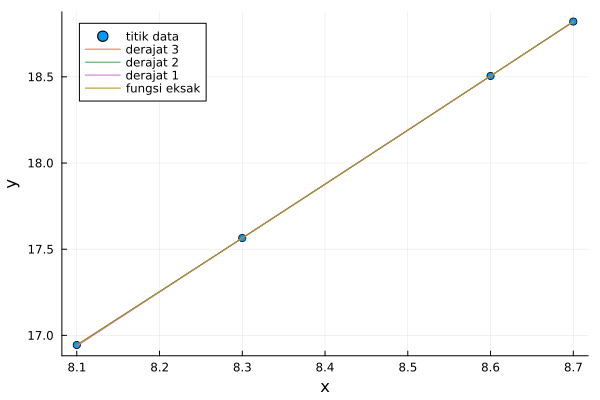

In [2]:
x1 = [8.1, 8.3, 8.6, 8.7]
y1 = [16.94410, 17.56492, 18.50515, 18.82091]

V = Lagrange_basis(x1)
a1 = V \ y1
p = poly_Lagrange

scatter(x1, y1, label="titik data",
    xlabel="x",
    ylabel="y"
)

xx = range(x1[1], x1[end], length=100)
yy_3 = [poly_Lagrange(xx[i], x1, a1) for i in 1:length(xx)]
yy_2 = [poly_Lagrange(xx[i], x1[2:4], a1[2:4]) for i in 1:length(xx)]
yy_1 = [poly_Lagrange(xx[i], x1[2:3], a1[2:3]) for i in 1:length(xx)]
f_eksak1(x_) = x_ .* log.(x_)

plot!(xx, yy_3, label="derajat 3")
plot!(xx, yy_2, label="derajat 2")
plot!(xx, yy_1, label="derajat 1")
plot!(xx, f_eksak1(xx), label="fungsi eksak")

### Perbedaan hasil interpolasi Lagrange berdasarkan ordernya untuk $f(8.4)$

In [3]:
# f(8.4)
order_1 = poly_Lagrange(8.4, x1[2:3], a1[2:3])
order_2 = poly_Lagrange(8.4, x1[2:4], a1[2:4])
order_3 = poly_Lagrange(8.4, x1, a1)

error_abs1 = abs(f_eksak1(8.4) - order_1)
error_abs2 = abs(f_eksak1(8.4) - order_2)
error_abs3 = abs(f_eksak1(8.4) - order_3)

println("derajat 1: $(order_1), error absolut: $(error_abs1)")
println("derajat 2: $(order_2), error absolut: $(error_abs2)")
println("derajat 3: $(order_3), error absolut: $(error_abs3)")

derajat 1: 17.87833, error absolut: 0.0011836708661476791
derajat 2: 17.877155000000002, error absolut: 8.670866151305745e-6
derajat 3: 17.8771425, error absolut: 3.829133849109212e-6


### No. 2: Interpolasi Lagrange untuk titik data No. 2

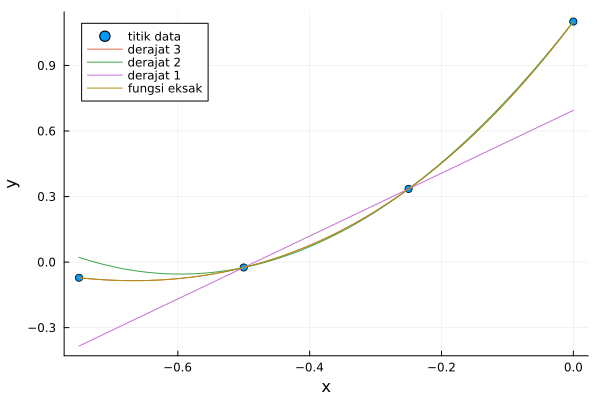

In [4]:
x2 = [-0.75, -0.5, -0.25, 0]
y2 = [-0.07181250, -0.02475000, 0.33493750, 1.10100000]

V = Lagrange_basis(x2)
a2 = V \ y2
p = poly_Lagrange

scatter(x2, y2, label="titik data",
    xlabel="x",
    ylabel="y"
)

xx = range(x2[1], x2[end], length=100)
yy_3 = [poly_Lagrange(xx[i], x2, a2) for i in 1:length(xx)]
yy_2 = [poly_Lagrange(xx[i], x2[2:4], a2[2:4]) for i in 1:length(xx)]
yy_1 = [poly_Lagrange(xx[i], x2[2:3], a2[2:3]) for i in 1:length(xx)]
f_eksak2(x_) = x_.^3 .+ 4.001 .* x_.^2 .+ 4.002 .* x_ .+ 1.101

plot!(xx, yy_3, label="derajat 3")
plot!(xx, yy_2, label="derajat 2")
plot!(xx, yy_1, label="derajat 1")
plot!(xx, f_eksak2(xx), label="fungsi eksak")

### Perbedaan hasil interpolasi Lagrange berdasarkan ordernya untuk $f(-0.3333)$

In [5]:
# f(-0.3333)
order_1 = poly_Lagrange(-0.3333, x2[2:3], a2[2:3])
order_2 = poly_Lagrange(-0.3333, x2[2:4], a2[2:4])
order_3 = poly_Lagrange(-0.3333, x2, a2)

error_abs1 = abs(f_eksak2(-0.3333) - order_1)
error_abs2 = abs(f_eksak2(-0.3333) - order_2)
error_abs3 = abs(f_eksak2(-0.3333) - order_3)

println("derajat 1: $(order_1), error absolut: $(error_abs1)")
println("derajat 2: $(order_2), error absolut: $(error_abs2)")
println("derajat 3: $(order_3), error absolut: $(error_abs3)")

derajat 1: 0.21508962500000003, error absolut: 0.04051550314699989
derajat 2: 0.16994588139000005, error absolut: 0.004628240463000088
derajat 3: 0.17457412185300003, error absolut: 1.1102230246251565e-16


### No. 3: Interpolasi Lagrange untuk titik data No. 3

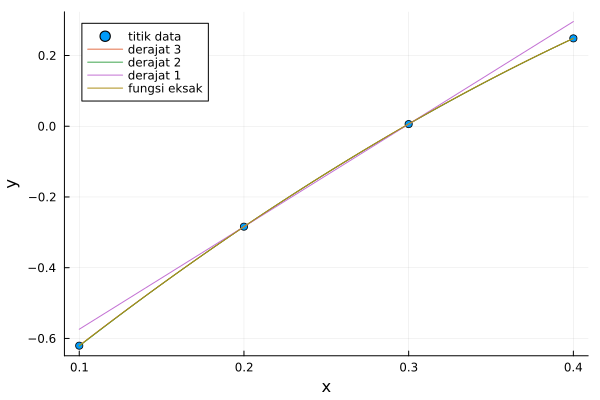

In [29]:
x3 = [0.1, 0.2, 0.3, 0.4]
y3 = [-0.62049958, -0.28398668, 0.0060095, 0.24842440]

V = Lagrange_basis(x3)
a3 = V \ y3
p = poly_Lagrange

scatter(x3, y3, label="titik data",
    xlabel="x",
    ylabel="y"
)

xx = range(x3[1], x3[end], length=100)
yy_3 = [poly_Lagrange(xx[i], x3, a3) for i in 1:length(xx)]
yy_2 = [poly_Lagrange(xx[i], x3[2:4], a3[2:4]) for i in 1:length(xx)]
yy_1 = [poly_Lagrange(xx[i], x3[2:3], a3[2:3]) for i in 1:length(xx)]
f_eksak3(x_) = x_ .* cos.(x_) .- 2 .* x_.^2 .+ 3 .* x_ .- 1

plot!(xx, yy_3, label="derajat 3")
plot!(xx, yy_2, label="derajat 2")
plot!(xx, yy_1, label="derajat 1")
plot!(xx, f_eksak3(xx), label="fungsi eksak")

### Perbedaan hasil interpolasi Lagrange berdasarkan ordernya untuk $f(0.25)$

In [30]:
# f(0.25)
order_1 = poly_Lagrange(0.25, x3[2:3], a3[2:3])
order_2 = poly_Lagrange(0.25, x3[2:4], a3[2:4])
order_3 = poly_Lagrange(0.25, x3, a3)

error_abs1 = abs(f_eksak3(0.25) - order_1)
error_abs2 = abs(f_eksak3(0.25) - order_2)
error_abs3 = abs(f_eksak3(0.25) - order_3)

println("derajat 1: $(order_1), error absolut: $(error_abs1)")
println("derajat 2: $(order_2), error absolut: $(error_abs2)")
println("derajat 3: $(order_3), error absolut: $(error_abs3)")

derajat 1: -0.13898859, error absolut: 0.006216695427661151
derajat 2: -0.13304093, error absolut: 0.0002690354276611573
derajat 3: -0.13310746499999998, error absolut: 0.000335570427661136


### No. 4: Interpolasi Lagrange untuk titik data No. 4

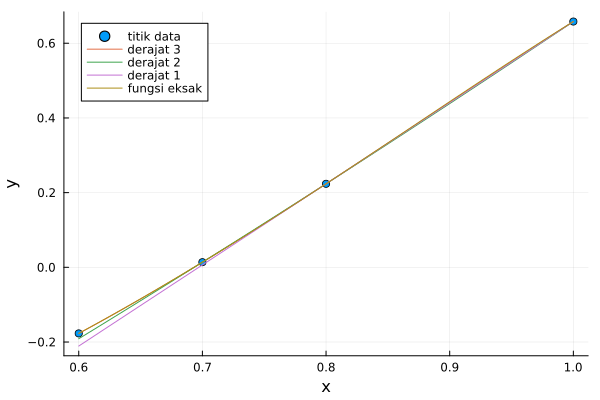

In [8]:
x4 = [0.6, 0.7, 0.8, 1.0]
y4 = [-0.17694460, 0.01375227, 0.22363362, 0.65809197]

V = Lagrange_basis(x4)
a4 = V \ y4
p = poly_Lagrange

scatter(x4, y4, label="titik data",
    xlabel="x",
    ylabel="y"
)
xx = range(x4[1], x4[end], length=100)
yy_3 = [poly_Lagrange(xx[i], x4, a4) for i in 1:length(xx)]
yy_2 = [poly_Lagrange(xx[i], x4[2:4], a4[2:4]) for i in 1:length(xx)]
yy_1 = [poly_Lagrange(xx[i], x4[3:4], a4[3:4]) for i in 1:length(xx)]
f_eksak4(x_) = sin.(exp.(x_) .- 2)

plot!(xx, yy_3, label="derajat 3")
plot!(xx, yy_2, label="derajat 2")
plot!(xx, yy_1, label="derajat 1")
plot!(xx, f_eksak4(xx), label="fungsi eksak")

### Perbedaan hasil interpolasi Lagrange berdasarkan ordernya untuk $f(0.9)$

In [9]:
# f(0.9)
order_1 = poly_Lagrange(0.9, x4[3:4], a4[3:4])
order_2 = poly_Lagrange(0.9, x4[2:4], a4[2:4])
order_3 = poly_Lagrange(0.9, x4, a4)

error_abs1 = abs(f_eksak4(0.9) - order_1)
error_abs2 = abs(f_eksak4(0.9) - order_2)
error_abs3 = abs(f_eksak4(0.9) - order_3)

println("derajat 1: $(order_1), error absolut: $(error_abs1)")
println("derajat 2: $(order_2), error absolut: $(error_abs2)")
println("derajat 3: $(order_3), error absolut: $(error_abs3)")

derajat 1: 0.440862795, error absolut: 0.0027296437702815646
derajat 2: 0.4384135199999999, error absolut: 0.005178918770281649
derajat 3: 0.44198500249999984, error absolut: 0.0016074362702817035


## Analisis Error

